In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import random

The stock retrieval function will retrieve the stock data from yahoo finance and store that in a dictionary

In [59]:
def stock_retrieval(companies, start_date, end_date):
    stock_data = {}
    for company in companies:
        data = yf.download(company, start=start_date, end=end_date)
        stock_data[company] = data.to_dict(orient='index')
    return stock_data


The stock stats function will take the necessary data we want for the analysis from yahoo finance

In [60]:
def stock_stats(stock_data):
    stats = {}
    for company, data in stock_data.items():
        open_prices = [v['Open'] for v in data.values()]
        close_prices = [v['Close'] for v in data.values()]
        
        avg_open = sum(open_prices) / len(open_prices)
        max_open = max(open_prices)
        min_open = min(open_prices)
        avg_close = sum(close_prices) / len(close_prices)
        max_close = max(close_prices)
        min_close = min(close_prices)
        # predefined threshold 7%
        significant_diff_dates = []
        for date, values in data.items():
            if abs(values['Close'] - values['Open']) > 0.07 * values['Close']:
                significant_diff_dates.append(date)
        
        stats[company] = {
            'avg_open': avg_open,
            'max_open': max_open,
            'min_open': min_open,
            'avg_close': avg_close,
            'max_close': max_close,
            'min_close': min_close,
            'significant_diff_dates': significant_diff_dates
        }
    return stats


In [61]:
def visualize_stats(stock_data, stats):
    for company, data in stock_data.items():
        dates = list(data.keys())
        open_prices = [v['Open'] for v in data.values()]
        close_prices = [v['Close'] for v in data.values()]
        
        plt.figure(figsize=(10, 6))
        plt.plot(dates, open_prices, label='Open Price')
        plt.plot(dates, close_prices, label='Close Price')
        plt.title(f'Stock Price of {company}')
        plt.xlabel('Time span')
        plt.ylabel('Price in US Dollars')
        plt.legend()
        plt.show()

        print(f"Average Open Price for {company}: {stats[company]['avg_open']}")
        print(f"Maximum Open Price for {company}: {stats[company]['max_open']}")
        print(f"Minimum Open Price for {company}: {stats[company]['min_open']}")
        print(f"Average Close Price for {company}: {stats[company]['avg_close']}")
        print(f"Maximum Close Price for {company}: {stats[company]['max_close']}")
        print(f"Minimum Close Price for {company}: {stats[company]['min_close']}")
        print(f"Dates with significant price differences for {company}: {stats[company]['significant_diff_dates']}")


Here I've mentioned the company names with time frame and using this I can get the graphs for all the six companies

Dropbox=DBX,
Microsoft=MSFT,
Nvidia=NVDA,
United Healthcare Group=UNH,
Cigna Corporation=CI,
Walgreens Boots Alliance=WBA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


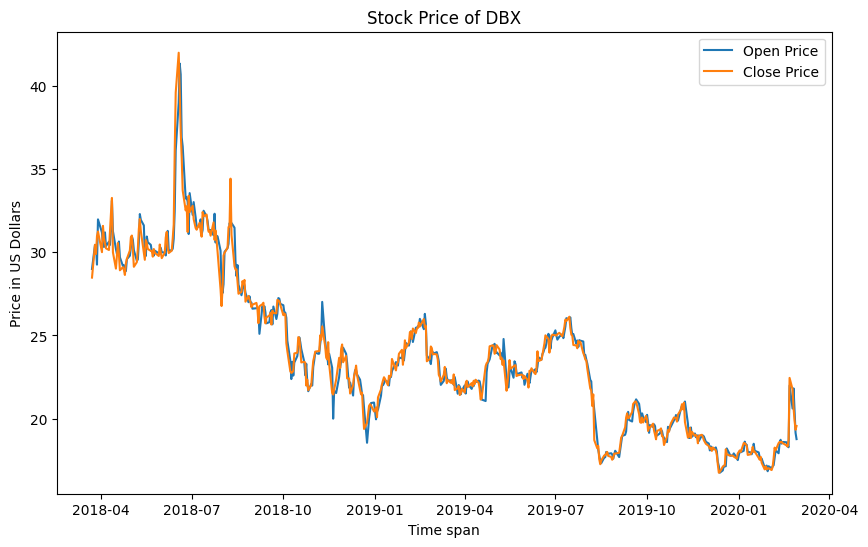

Average Open Price for DBX: 23.84504723597846
Maximum Open Price for DBX: 41.349998474121094
Minimum Open Price for DBX: 16.75
Average Close Price for DBX: 23.825544106642077
Maximum Close Price for DBX: 42.0
Minimum Close Price for DBX: 16.75
Dates with significant price differences for DBX: [Timestamp('2018-06-14 00:00:00'), Timestamp('2018-06-15 00:00:00'), Timestamp('2018-06-18 00:00:00'), Timestamp('2018-06-20 00:00:00'), Timestamp('2018-06-22 00:00:00'), Timestamp('2018-07-30 00:00:00'), Timestamp('2018-08-09 00:00:00'), Timestamp('2018-08-13 00:00:00'), Timestamp('2018-11-19 00:00:00'), Timestamp('2019-04-22 00:00:00'), Timestamp('2019-08-09 00:00:00')]


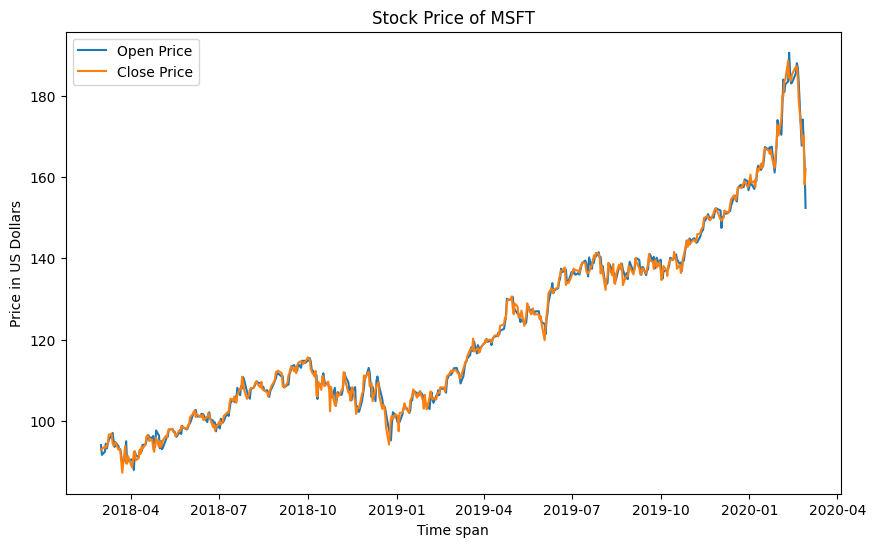

Average Open Price for MSFT: 122.14063646684347
Maximum Open Price for MSFT: 190.64999389648438
Minimum Open Price for MSFT: 87.8499984741211
Average Close Price for MSFT: 122.12302193916578
Maximum Close Price for MSFT: 188.6999969482422
Minimum Close Price for MSFT: 87.18000030517578
Dates with significant price differences for MSFT: []


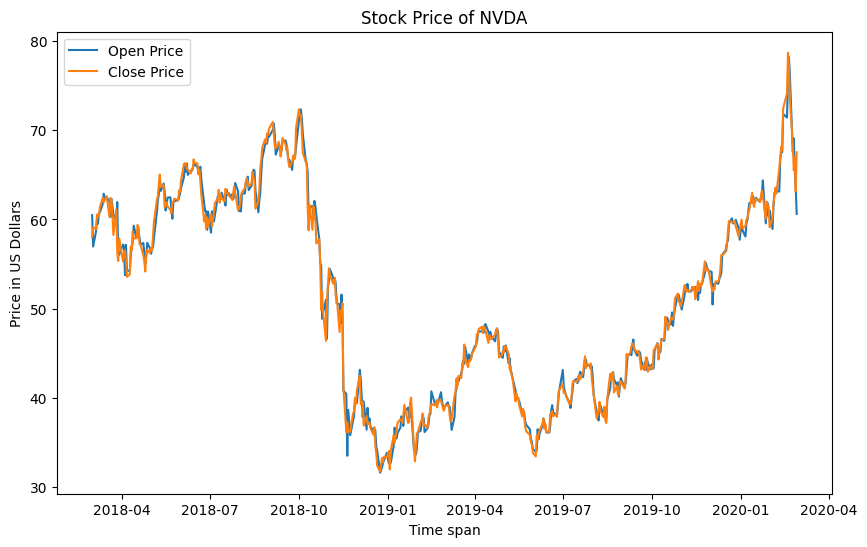

Average Open Price for NVDA: 51.365000013802685
Maximum Open Price for NVDA: 78.19249725341797
Minimum Open Price for NVDA: 31.622499465942383
Average Close Price for NVDA: 51.36061625926205
Maximum Close Price for NVDA: 78.67500305175781
Minimum Close Price for NVDA: 31.770000457763672
Dates with significant price differences for NVDA: [Timestamp('2018-03-27 00:00:00'), Timestamp('2018-10-24 00:00:00'), Timestamp('2018-10-29 00:00:00'), Timestamp('2018-10-30 00:00:00'), Timestamp('2018-11-19 00:00:00'), Timestamp('2018-11-20 00:00:00'), Timestamp('2018-12-04 00:00:00'), Timestamp('2018-12-07 00:00:00'), Timestamp('2020-02-28 00:00:00')]


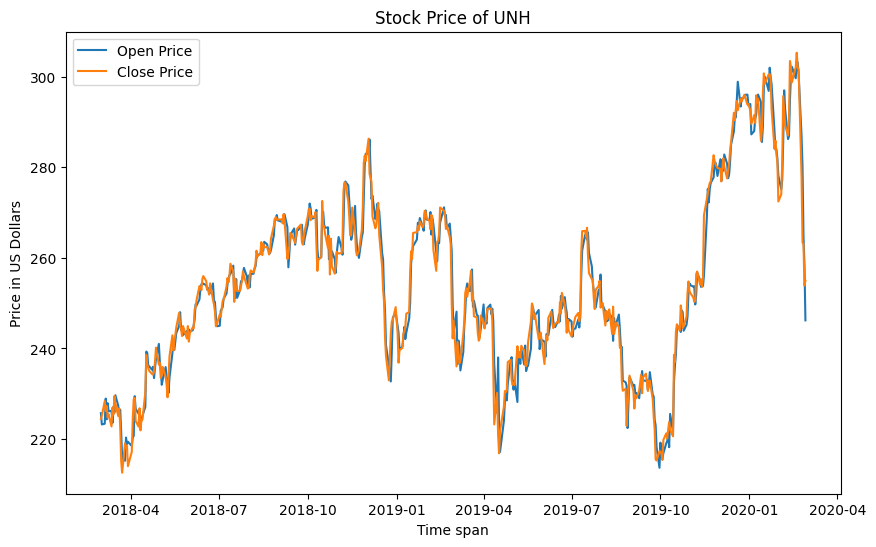

Average Open Price for UNH: 253.68602432645338
Maximum Open Price for UNH: 303.3699951171875
Minimum Open Price for UNH: 213.63999938964844
Average Close Price for UNH: 253.54821025021744
Maximum Close Price for UNH: 305.30999755859375
Minimum Close Price for UNH: 212.5500030517578
Dates with significant price differences for UNH: [Timestamp('2019-04-16 00:00:00')]


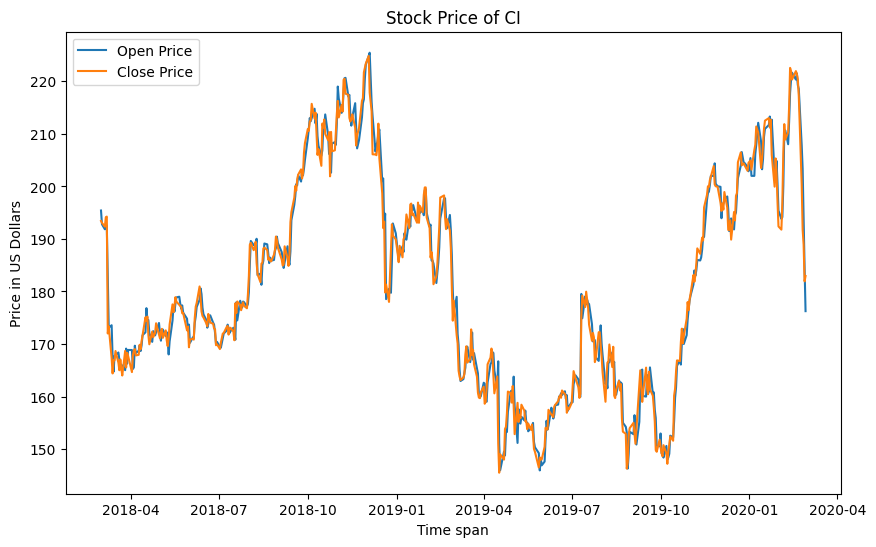

Average Open Price for CI: 180.98667986587313
Maximum Open Price for CI: 225.4499969482422
Minimum Open Price for CI: 145.92999267578125
Average Close Price for CI: 180.86964219322735
Maximum Close Price for CI: 224.83999633789062
Minimum Close Price for CI: 145.49000549316406
Dates with significant price differences for CI: [Timestamp('2018-12-20 00:00:00'), Timestamp('2019-04-16 00:00:00')]


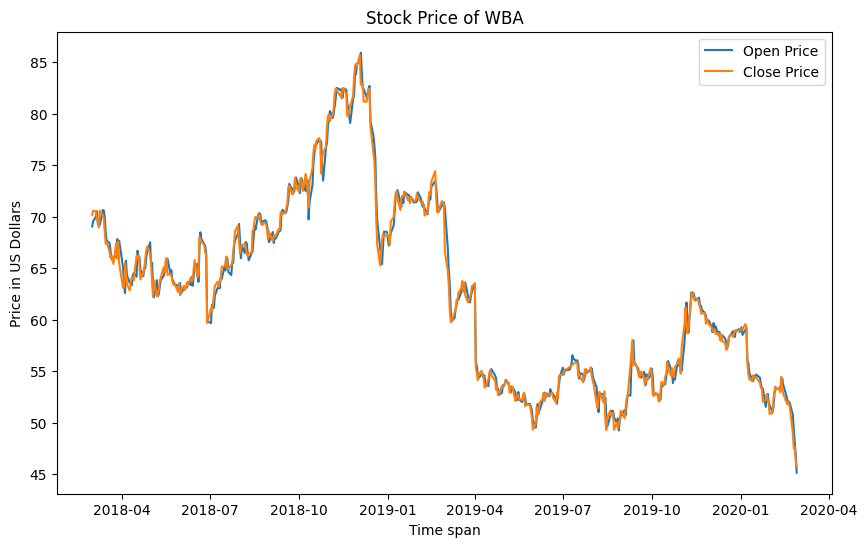

Average Open Price for WBA: 62.6060636152567
Maximum Open Price for WBA: 85.93000030517578
Minimum Open Price for WBA: 45.15999984741211
Average Close Price for WBA: 62.55827050938995
Maximum Close Price for WBA: 85.69000244140625
Minimum Close Price for WBA: 45.7599983215332
Dates with significant price differences for WBA: []


In [62]:
companies = ['DBX', 'MSFT', 'NVDA', 'UNH', 'CI', 'WBA']
start_date_pre_covid = '2018-03-01'
end_date_pre_covid = '2020-03-01'
start_date_covid = '2020-03-01'
end_date_covid='2021-03-01'
end_date_post_covid = '2024-04-01'

# Fetch historical data for pre-COVID era
historical_data_pre_covid = stock_retrieval(companies, start_date_pre_covid, end_date_pre_covid)

# Calculate statistical parameters for pre-COVID era
statistical_parameters_pre_covid = stock_stats(historical_data_pre_covid)

# Visualize statistical parameters for pre-COVID era
visualize_stats(historical_data_pre_covid, statistical_parameters_pre_covid)





In [63]:
def regression_analysis(stock_data, window_size=4):
    regression_coefficients = {}
    for company, data in stock_data.items():
        dates = list(data.keys())
        close_prices = np.array([v['Close'] for v in data.values()])
        dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)
        
        coefficients = []
        for i in range(len(dates) - window_size + 1):
            X = dates[i:i+window_size]
            y = close_prices[i:i+window_size]
            model = LinearRegression().fit(X, y)
            coefficients.append(model.coef_[0])
        
        regression_coefficients[company] = coefficients
    return regression_coefficients


In [64]:
def rolling_window_regression(data, window_size):
    coefficients = []
    dates = data.index
    
    for i in range(len(data) - window_size + 1):
        window_data = data.iloc[i:i+window_size]
        X = np.arange(len(window_data)).reshape(-1, 1)
        y = window_data.values
        
        model = LinearRegression()
        model.fit(X, y)
        
        coefficients.append(model.coef_[0])
    
    return dates[window_size-1:], coefficients


In [65]:

def plot_rolling_window_regression(companies, start_date, end_date, window_size):
    plt.figure(figsize=(12, 6))
    for company in companies:
        data = yf.download(company, start=start_date, end=end_date)['Close']
        dates, coefficients = rolling_window_regression(data, window_size)
        plt.plot(dates, coefficients, label=company)
    plt.title('Rolling Window Regression')
    plt.xlabel('Date')
    plt.ylabel('Regression Coefficient')
    plt.legend()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


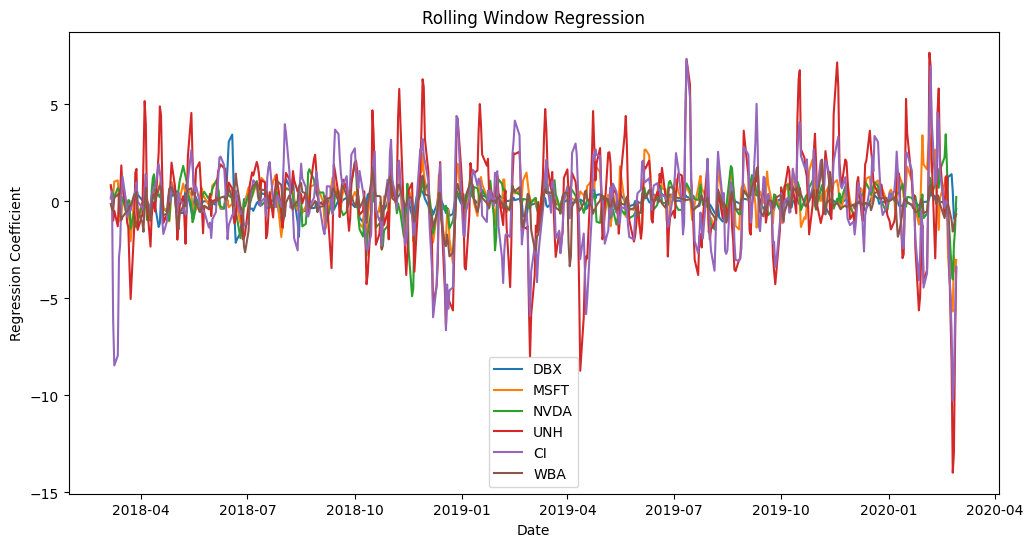

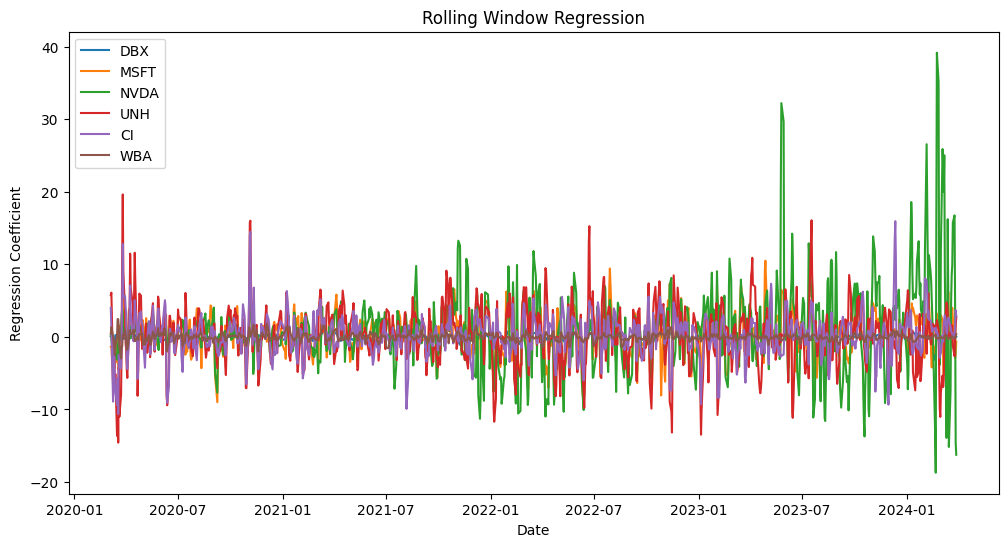

In [66]:
#  rolling window regression analysis for pre-COVID era
plot_rolling_window_regression(companies, start_date_pre_covid, end_date_pre_covid, window_size=4)

#  rolling window regression analysis for COVID and post-COVID era
plot_rolling_window_regression(companies, start_date_covid, end_date_post_covid, window_size=4)


Principal Component Analysis to stock data


In [67]:
def apply_pca(stock_data):
    pca_components = {}
    for company, data in stock_data.items():
        # Extract relevant features
        features = np.array([[v['Open'], v['High'], v['Low'], v['Close'], v['Volume']] for v in data.values()])
        # Standardize the features
        scaler = StandardScaler()
        standardized_features = scaler.fit_transform(features)
        # Apply PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(standardized_features)
        pca_components[company] = principal_components
    return pca_components

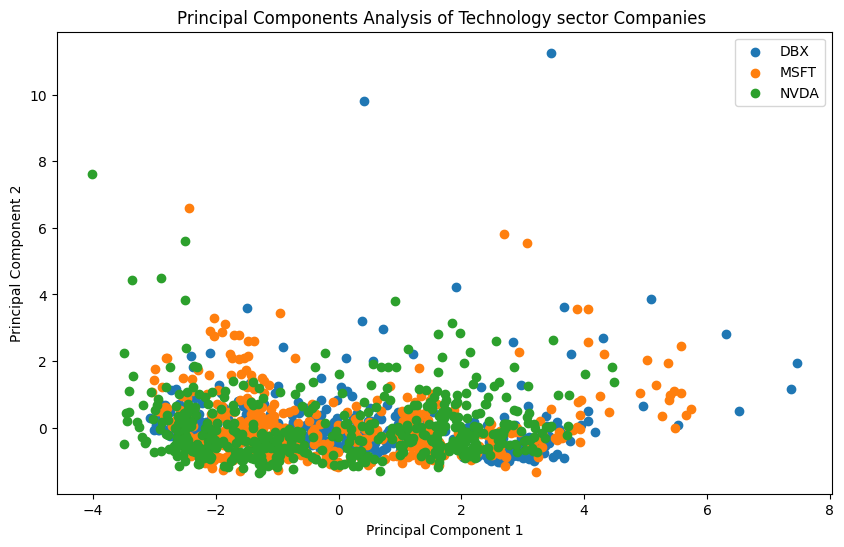

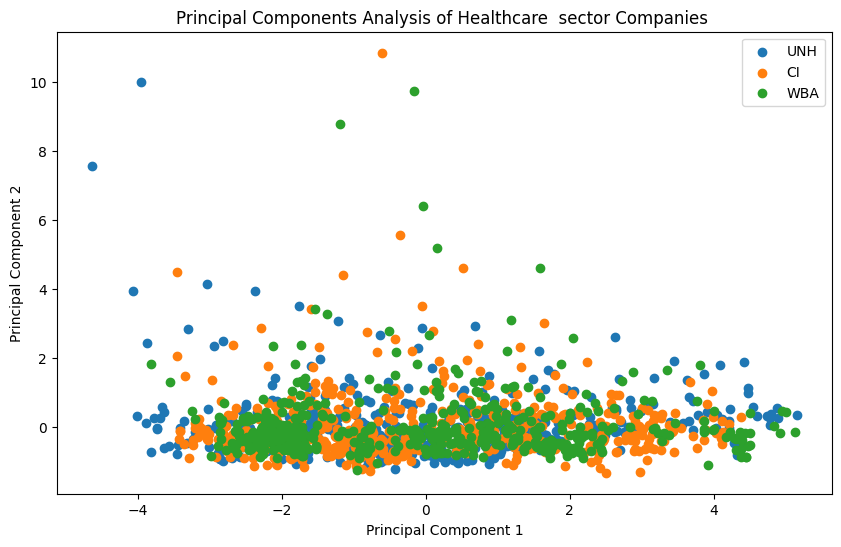

In [68]:

#  Principal Component Analysis to stock data
pca_components = apply_pca(historical_data_pre_covid)

#  PCA for tech companies
tech_companies = ['DBX', 'MSFT', 'NVDA']
tech_data_pre_covid = {company: historical_data_pre_covid[company] for company in tech_companies}
tech_pca_components = apply_pca(tech_data_pre_covid)
plt.figure(figsize=(10, 6))
for company, pca_component in tech_pca_components.items():
    plt.scatter(pca_component[:, 0], pca_component[:, 1], label=company)

plt.title('Principal Components Analysis of Technology sector Companies ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

healthcare_companies = ['UNH', 'CI', 'WBA']
healthcare_data_pre_covid = {company: historical_data_pre_covid[company] for company in healthcare_companies}
healthcare_pca_components = apply_pca(healthcare_data_pre_covid)
plt.figure(figsize=(10, 6))
for company, pca_component in healthcare_pca_components.items():
    plt.scatter(pca_component[:, 0], pca_component[:, 1], label=company)

plt.title('Principal Components Analysis of Healthcare  sector Companies ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()


Company: DBX, Forecasted prices length: 366


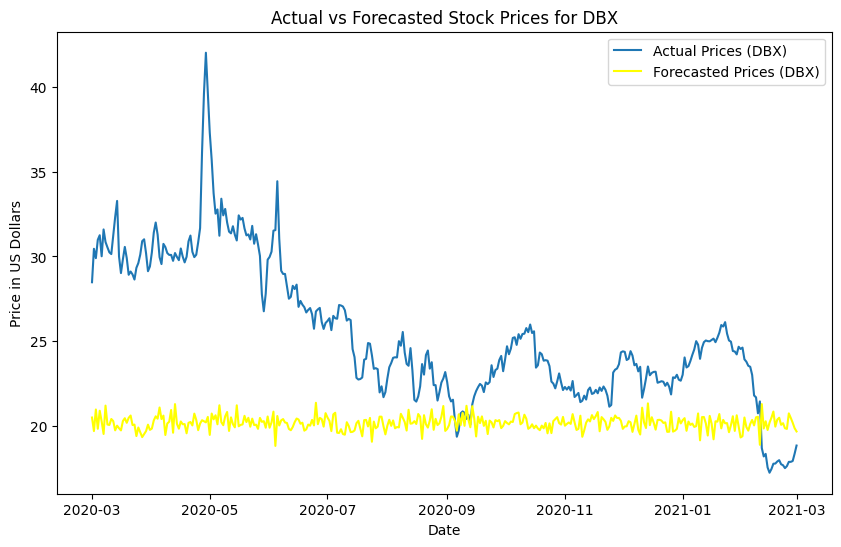

Company: MSFT, Forecasted prices length: 366


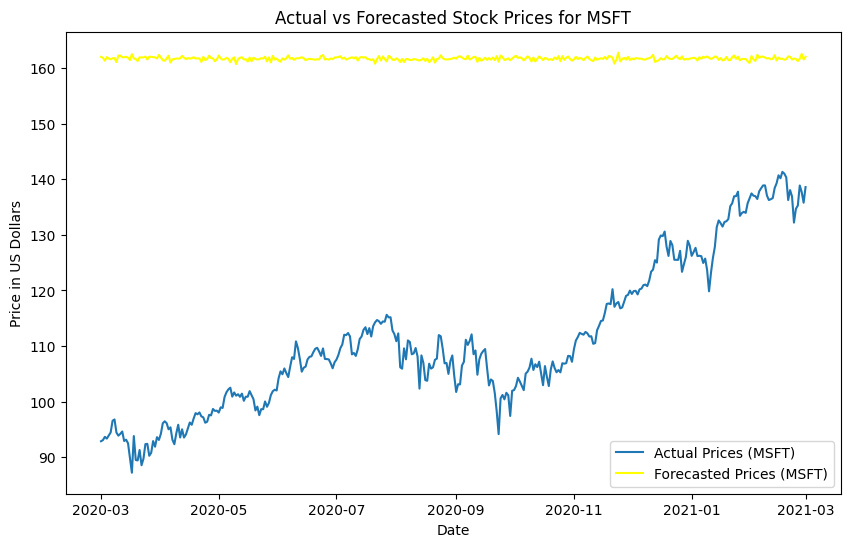

Company: NVDA, Forecasted prices length: 366


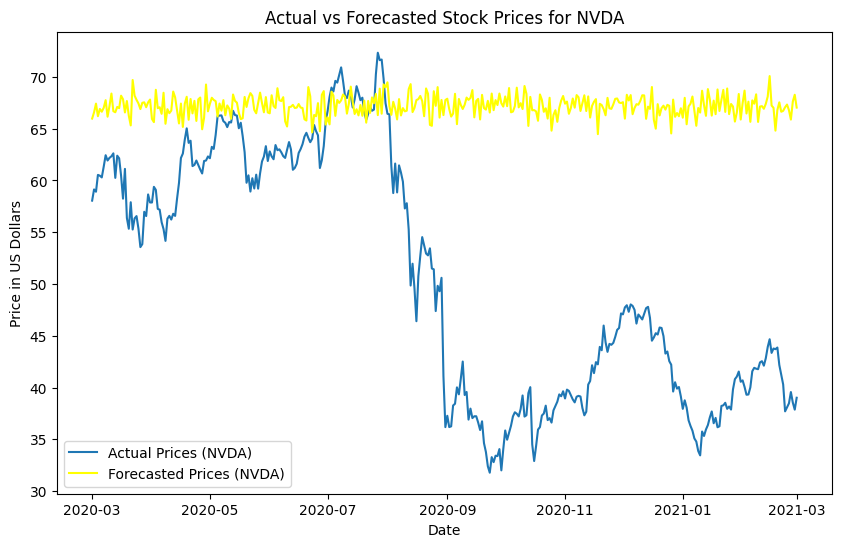

Company: UNH, Forecasted prices length: 366


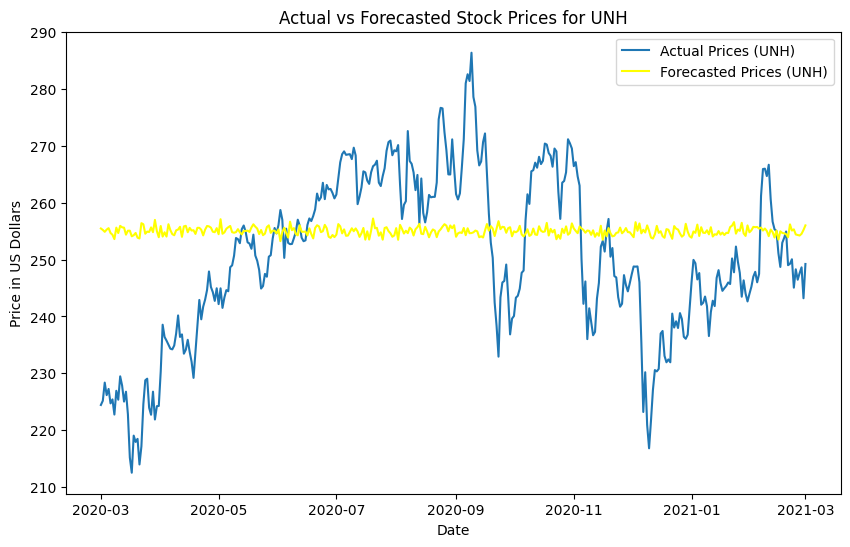

Company: CI, Forecasted prices length: 366


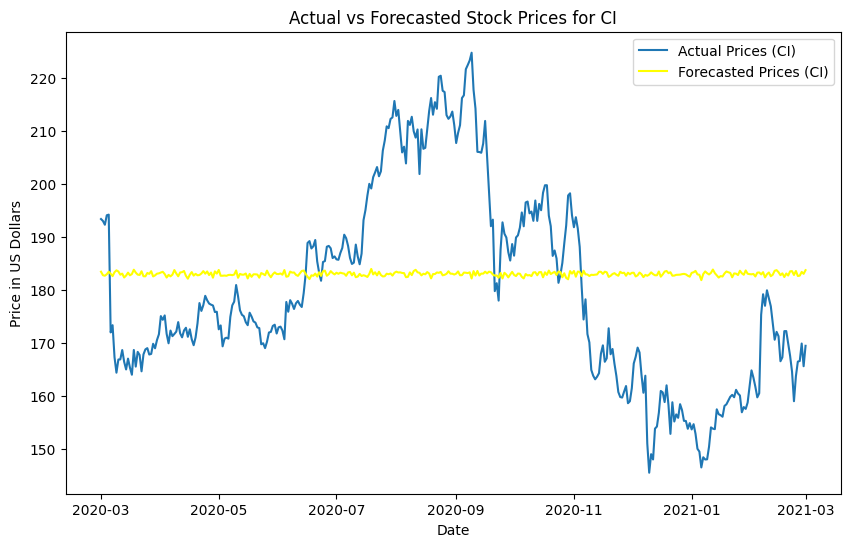

Company: WBA, Forecasted prices length: 366


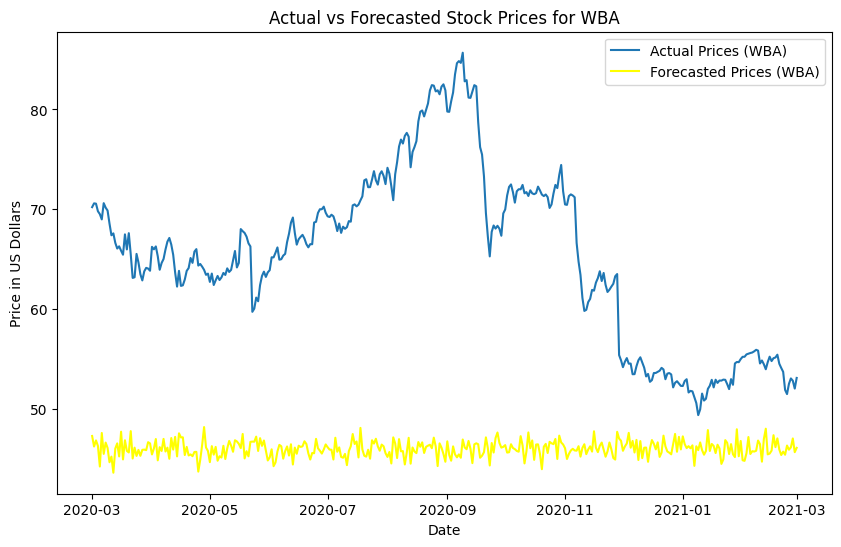

In [69]:
def plot_forecast(stock_data, noise_std_range=(0.2, 5.0), random_params=True, start_date_actual=None, end_date_actual=None, start_date_forecast=None, end_date_forecast=None):
    if start_date_actual is None:
        start_date_actual = "2020-03-01"
    if end_date_actual is None:
        end_date_actual = "2021-03-01"
    if start_date_forecast is None:
        start_date_forecast = "2020-03-01"
    if end_date_forecast is None:
        end_date_forecast = "2021-03-01"
        
    forecasted_prices = {}
    for company, data in stock_data.items():
        # Features and target
        dates = pd.to_datetime(list(data.keys())).astype('int64').values.reshape(-1, 1)
        prices = np.array([v['Close'] for v in data.values()])
        
        # Standard deviation range for noise
        noise_std = random.uniform(noise_std_range[0], noise_std_range[1])
        
        # Parameters for the Gradient Boosting Regressor model
        if random_params:
            n_estimators = random.randint(50, 200)
            learning_rate = random.uniform(0.15, 0.3)
            max_depth = random.randint(2, 5)
        else:
            n_estimators = 100
            learning_rate = 0.1
            max_depth = 1
        
        # Gradient Boosting Regressor model
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
        model.fit(dates, prices)
        
        # Generate forecast dates
        forecast_dates = pd.date_range(start=start_date_forecast, end=end_date_forecast)
        forecast_dates_int = forecast_dates.astype('int64').values.reshape(-1, 1)
        
        # Forecast
        forecast = model.predict(forecast_dates_int)
        
        # Adding noise to forecasted prices
        noise = np.random.normal(0, noise_std, len(forecast))
        forecast_with_noise = forecast + noise
        
        forecasted_prices[company] = forecast_with_noise
    
    # Plotting forecast
    for company, forecasted_prices in forecasted_prices.items():
        print(f"Company: {company}, Forecasted prices length: {len(forecasted_prices)}")
        actual_prices = [v['Close'] for v in stock_data[company].values()]
        actual_dates = pd.date_range(start=start_date_actual, end=end_date_actual)[:len(actual_prices)]
        forecasted_dates = pd.date_range(start=start_date_forecast, end=end_date_forecast, periods=len(forecasted_prices))
        plt.figure(figsize=(10, 6))
        plt.plot(actual_dates, actual_prices[:len(actual_dates)], label=f'Actual Prices ({company})')
        plt.plot(forecasted_dates, forecasted_prices, label=f'Forecasted Prices ({company})', color='yellow')
        plt.title(f'Actual vs Forecasted Stock Prices for {company}')
        plt.xlabel('Date')
        plt.ylabel('Price in US Dollars')
        plt.legend()
        plt.show()

# Usage example
plot_forecast(historical_data_pre_covid, noise_std_range=(0.1, 1.0), random_params=True)
